## Importar dataframes

In [1]:
import pandas as pd

ies = ['Una', 'UniBH', 'Unisociesc', 'USJT', 'Ânima']

list = []

for ies in ies:
    base = pd.read_excel('Downloads/RA %s.xlsx' % ies, skiprows = 3).iloc[:, :-1]
    column = ['Empresa']
    [column.append(col) for col in base.columns.tolist()]
    base['Empresa'] = [ies for i in range(len(base))]
    base = base[column]
    list.append(base)
    
base = pd.concat(list)
display(base.head(5).sort_index())

,Empresa,Id HugMe,Origem,Id Origem,Data Reclamação,Status Hugme,Status RA,Arquivado ?,Congelado?,Título,...,Moderação usuário que solicitou,Moderação data da resposta,Tipo Hugme,Data fechamento,Quantidade interações consumidor,Quantidade interações empresa,Feed tipo,Fonte informação tipo,Histórico,Canal
0,Una,28609971,ReclameAQUI,96557163,2019-10-30 08:54:12,Novo,Não respondido,Não,Não,Falta de acesso ao U Life,...,NaN,NaT,NaN,NaT,1,0,NaN,RA Reclamação,action: INTERACAO\ndata: 30/10/2019 08:54:54\n...,NaN
1,Una,28600751,ReclameAQUI,96537423,2019-10-29 15:51:26,Respondido,Respondido,Não,Não,Renovação online de livros,...,NaN,NaT,NaN,NaT,1,1,NaN,RA Reclamação,action: INTERACAO\ndata: 29/10/2019 15:52:58\n...,NaN
2,Una,28599629,ReclameAQUI,96535013,2019-10-29 15:00:25,Novo,Não respondido,Não,Não,Não tenho acesso ao portal do aluno Ulife,...,NaN,NaT,NaN,NaT,1,0,NaN,RA Reclamação,action: INTERACAO\ndata: 29/10/2019 15:01:00\n...,NaN
3,Una,28591130,ReclameAQUI,96521363,2019-10-29 10:19:51,Respondido,Respondido,Não,Não,Portal dos alunos fora do ar,...,NaN,NaT,NaN,NaT,1,1,NaN,RA Reclamação,action: INTERACAO\ndata: 29/10/2019 10:21:06\n...,NaN
4,Una,28582802,ReclameAQUI,96503363,2019-10-28 17:58:49,Respondido,Respondido,Não,Não,"Área do Aluno só vive fora do ar, prejudicando...",...,NaN,NaT,NaN,NaT,1,1,NaN,RA Reclamação,action: INTERACAO\ndata: 28/10/2019 17:58:54\n...,NaN


In [11]:
[column for column in base.columns.tolist() if 'data' in column or 'Data' in column]

['Data Reclamação',
 'Data Avaliacao',
 'Data de Resposta',
 'Data Consideração Consumidor',
 'Data Consideração Empresa',
 'Data última réplica',
 'Data da última modificação',
 'Data de Desativação RA',
 'Moderação data de solicitação',
 'Moderação data da resposta',
 'Data fechamento']

## Criar dataframe de indicadores

In [2]:
from datetime import timedelta
import numpy as np

columns = ['Empresa', 'Id HugMe', 'Data Reclamação', 'Status RA', 'Voltaria a fazer negócio?', 'Nota']
data = lambda d: base[(base['Data Reclamação'] > (d - timedelta(days = 180))) & (base['Data Reclamação'] <= d)][columns]
# date = np.unique([date.date() for date in base[base['Data Reclamação'] >= (base['Data Reclamação'].sort_values().tolist()[0] + timedelta(days = 180))]['Data Reclamação'].tolist()])
date = [base['Data Reclamação'].max().date() - timedelta(days = i) for i in range((base['Data Reclamação'].max().date() - base['Data Reclamação'].min().date() - timedelta(days = 180)).days)]

nota = lambda data_d: data_d['Nota'].tolist()

ava_res = lambda row: 1 if row == 'Avaliado Resolvido' else (0 if row == 'Avaliado Não Resolvido' else np.nan)
ind_sol = lambda data_d: [ava_res(row) for row in data_d['Status RA']]

vol_neg = lambda row: 1 if row == 'Sim' else (0 if row == 'Não' else np.nan)
neg_nov = lambda data_d: [vol_neg(row) for row in data_d['Voltaria a fazer negócio?']]

ava_ra = lambda data_d: 1 * 2 + np.nanmean(nota(data_d)) / 10 * 3 + np.nanmean(ind_sol(data_d)) * 3 + np.nanmean(neg_nov(data_d)) * 2

df_ind = pd.DataFrame([[empresa, d, round(np.nanmean(nota(data(d)[data(d)['Empresa'] == empresa])), 3), round(np.nanmean(ind_sol(data(d)[data(d)['Empresa'] == empresa])), 3), round(np.nanmean(neg_nov(data(d)[data(d)['Empresa'] == empresa])), 3), round(ava_ra(data(d)[data(d)['Empresa'] == empresa]), 3)] for empresa in np.unique(base.Empresa) for d in date], columns = ['Empresa', 'Data Reclamação', 'Nota', 'Índice de Solução', 'Voltaria a fazer negócio', 'Avaliação Reclame Aqui'])

display(df_ind.head(5))

/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """


,Empresa,Data Reclamação,Nota,Índice de Solução,Voltaria a fazer negócio,Avaliação Reclame Aqui
0,USJT,2019-10-30,5.410,0.786,0.556,7.093
1,USJT,2019-10-29,5.364,0.780,0.551,7.050
2,USJT,2019-10-28,5.370,0.782,0.546,7.048
3,USJT,2019-10-27,5.370,0.782,0.546,7.048
4,USJT,2019-10-26,5.370,0.782,0.546,7.048


## Criar dataframe de tags

In [3]:
import numpy as np

df_tags = pd.DataFrame([[id, base[base['Id HugMe'] == id]['Data Reclamação'].tolist()[0], ies, item] for id in base['Id HugMe'] for ies in np.unique(base.Empresa) for row in [tag.split(' ; ') for index, tag in base[(base.Empresa == ies) & (base['Id HugMe'] == id)].Tags.items() if type(tag) == str] for item in row], columns = ['Id HugMe', 'Data Reclamação', 'Empresa', 'Tag'])

display(df_tags.head(5))

,Id HugMe,Data Reclamação,Empresa,Tag
0,28570673,2019-10-28 08:36:55,Una,Fies
1,28570673,2019-10-28 08:36:55,Una,Aditamento
2,28555389,2019-10-26 08:08:36,Una,Boleto
3,28555389,2019-10-26 08:08:36,Una,Revisão de boleto
4,28520538,2019-10-24 11:09:33,Una,Acordo


## Plotar word cloud



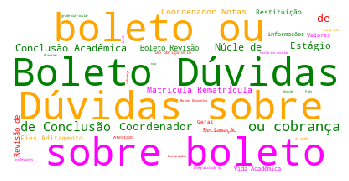

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta'])

wordcloud = WordCloud(background_color = 'white',
                      colormap = mapa_cores,
                      max_words = 100)

wordcloud.generate(' '.join(df_tags.Tag.tolist()))
%matplotlib inline
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Instalar pacote

In [5]:
! pip install gspread_dataframe

## Configurar spreadsheet

In [6]:
import gspread_dataframe as gd
from oauth2client.service_account import ServiceAccountCredentials
import gspread

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('Documents/BLiP to G-Sheets.json', scope)
gc = gspread.authorize(credentials)

## Abrir spreadsheet

In [7]:
ws = gc.open_by_key('1BtFgYqVlgy5mDRpdyi62J0D4CfFBgsbOAnQUDspflSE')

## Limpar worksheet

In [8]:
ws.worksheet('Sheet1').resize(rows = 1)
ws.worksheet('Sheet2').resize(rows = 1)
ws.worksheet('Sheet3').resize(rows = 1)

{'spreadsheetId': '1BtFgYqVlgy5mDRpdyi62J0D4CfFBgsbOAnQUDspflSE',
 'replies': [{}]}

## Alimentar worksheet

In [9]:
gd.set_with_dataframe(ws.worksheet('Sheet1'), base)
gd.set_with_dataframe(ws.worksheet('Sheet2'), df_tags)
gd.set_with_dataframe(ws.worksheet('Sheet3'), df_ind)